# SRCNN : View of Result  
.npyフォーマットで保存されたGPUでの計算過程をグラフ化する  
学習過程のPSNR遷移グラフ  

In [20]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

dBhistory_file = 'dBhistory.npy'

### 学習過程のPSNR(dB)グラフ  
縦軸：PSNR(dB)  
横軸：epoch 50000エポックを500エポックごとにdBを表示  
凡例：  
SRCNN-naive　データ拡張無し  
SRCNN        データ拡張あり(flip, mirror, rotate)  
SRCNN-c11    特徴抽出層の拡張　９x９と１１x１１のカーネルで特徴抽出  

SRCNN            MAX = 28.696995dB
SRCNN-naive      MAX = 28.593029dB
Loaded data files 2


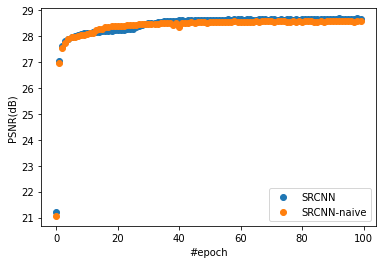

In [21]:
plot_type = 1  # 0:plot 1:scatter

dBhistory_files = [str(d) for d in Path('result').glob('*/'+dBhistory_file)]
resultdB = {}
for dBhistory in dBhistory_files:
    dB = np.load(dBhistory)
    job = os.path.dirname(dBhistory).split('/')[-1]
    resultdB[job] = dB
    print("{:16s} MAX = {:.6f}dB".format(job,max(dB)))

if len(resultdB)==0:
    print('Error : Shown Data not found!')
else:
    print('Loaded data files',len(resultdB))

    if plot_type==0:
        # plot
        n_epoch = min([len(resultdB[k]) for k in resultdB])
        for k in resultdB.keys():
            resultdB[k]=resultdB[k][:n_epoch]
        for k in resultdB.keys():
            plt.plot(range(n_epoch), resultdB[k])
    else:
        # scatter
        for k in resultdB.keys():
            data = resultdB[k]
            plt.scatter(range(len(data)), data)

    plt.legend(resultdB.keys())
    plt.xlabel("#epoch")
    plt.ylabel("PSNR(dB)")
    plt.show()